# Project 1: Exploratory Data Analysis on the Titanic Dataset

**Goal:** To analyze the Titanic dataset to uncover factors that influenced passenger survival.

## 1. Setup and Data Loading

First, we'll import the necessary libraries and load the data. We'll use pandas for data manipulation, and seaborn/matplotlib for plotting.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Initial Data Inspection

Let's get a basic understanding of our data's structure, data types, and check for missing values.

In [11]:
df.info()

print("\n" + "="*40 + "\n")

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB




,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Observation:** We have missing values in `age`, `deck`, and `embarked`. The `deck` column has too many missing values to be useful, so we'll likely drop it.

## 3. Data Cleaning

Now, we'll handle the missing values. The strategy is:
* **Age:** Fill missing values with the median age. The median is better than the mean here because it's less sensitive to outliers.
* **Embarked:** Fill the 2 missing values with the most common port of embarkation (the mode).
* **Deck:** Drop this column entirely as over 75% of its data is missing.
* **Embark Town:** This column is redundant since we have `embarked`, so we can drop it too.

In [15]:
age_median = df['age'].median()
embarked_mode = df['embarked'].mode()[0]

df['age'] = df['age'].fillna(age_median)
df['embarked'] = df['embarked'].fillna(embarked_mode)

df.drop(['deck', 'embark_town'], axis=1, inplace=True, errors='ignore')

df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

## 4. Exploratory Data Analysis & Visualization

Let's ask some questions and answer them with visualizations to find patterns.

#### Q1: What was the overall survival rate?

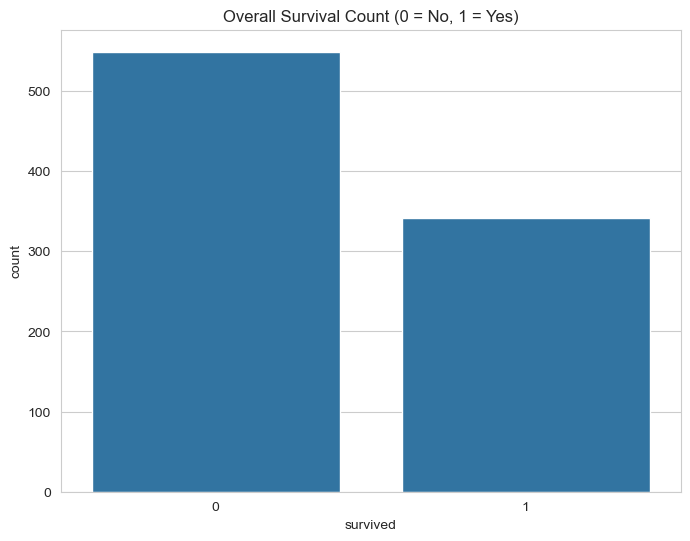

Overall Survival Rate: 38.38%


In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df)
plt.title('Overall Survival Count (0 = No, 1 = Yes)')
plt.show()

survival_rate = df['survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

#### Q2: How did survival vary by Passenger Class (Pclass)?

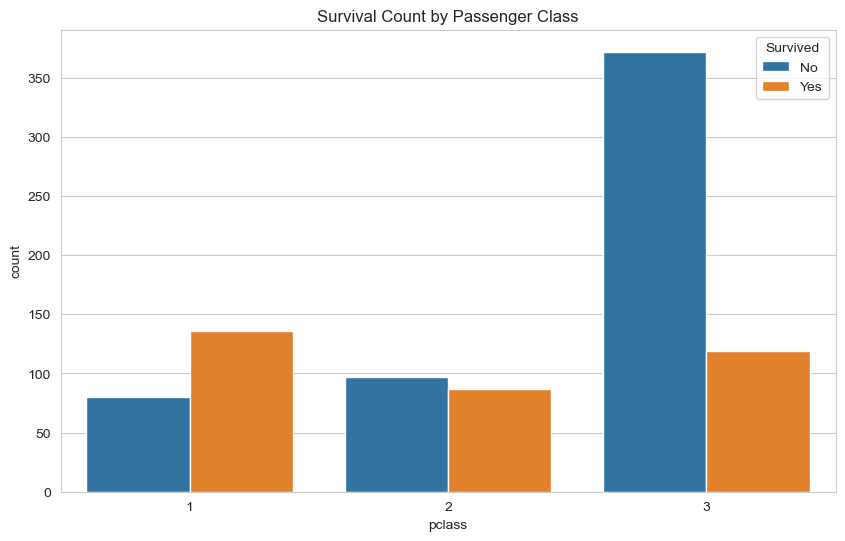

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Insight:** Passengers in **First Class had a much higher survival rate** compared to those in Third Class. Wealth and status clearly played a significant role.

#### Q3: How did survival vary by Gender (Sex)?

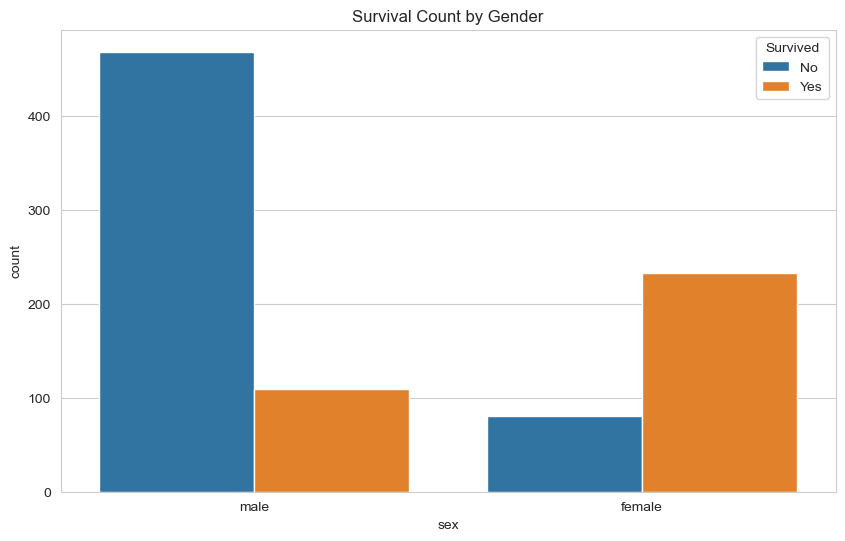

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Insight:** **Females had a significantly higher chance of survival** than males, reflecting the "women and children first" protocol.

#### Q4: What was the age distribution of passengers, and how did it affect survival?

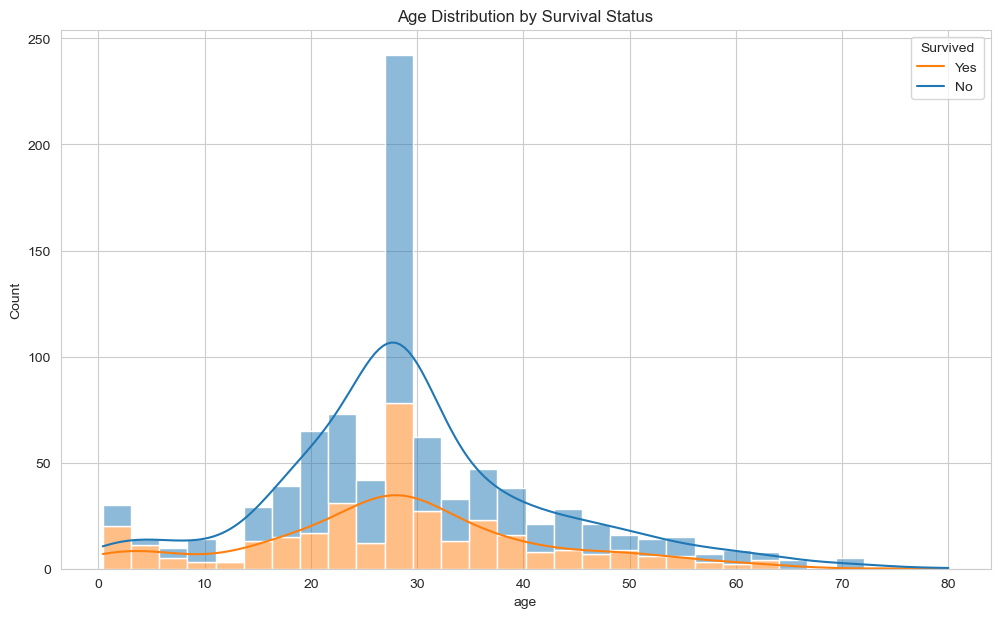

In [19]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='age', hue='survived', kde=True, multiple='stack')
plt.title('Age Distribution by Survival Status')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

**Insight:** **Children (approx. age < 10) had a higher survival rate**. A large number of deaths occurred in the 20-40 age range, which was the most populous group.

#### Q5: Did having family aboard (siblings, spouses, parents, children) affect survival?

Let's create a new feature `family_size` to simplify this analysis.

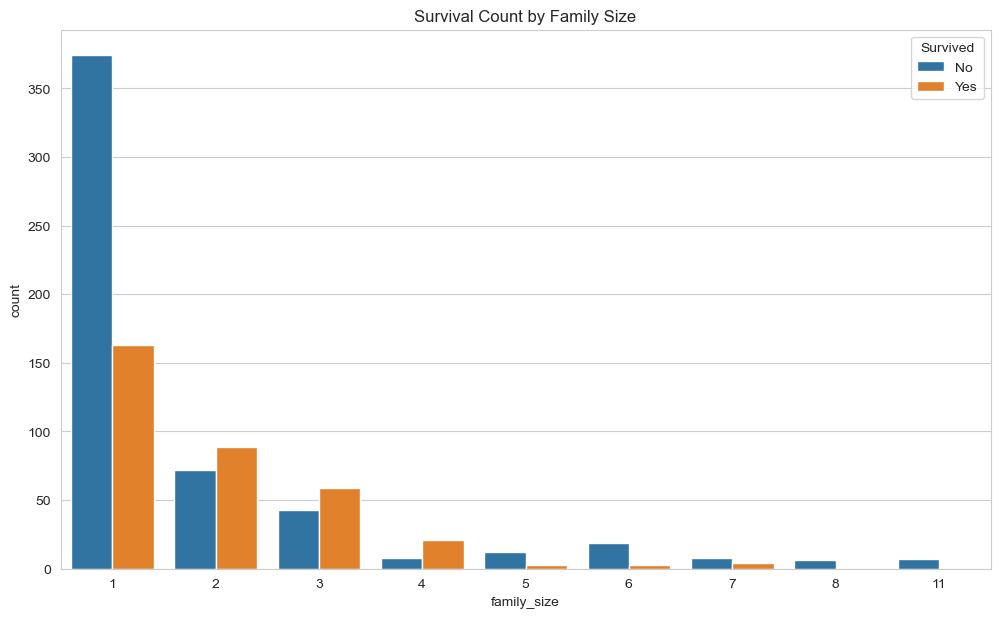

In [21]:
df['family_size'] = df['sibsp'] + df['parch'] + 1 

plt.figure(figsize=(12, 7))
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Insight:** Passengers who were **alone (`family_size` = 1) had a lower survival rate**. Small families (2-4 members) had the best chance of survival. Large families also had a lower survival rate, perhaps because it was harder to manage them during the evacuation.

## 5. Key Insights & Summary

Based on the analysis, here are the key factors that influenced survival on the Titanic:

* **Gender:** Being female was the strongest indicator for survival. The survival rate for women was nearly 75%, compared to less than 20% for men.
* **Passenger Class:** First-class passengers had a survival rate of over 60%, while third-class passengers had a rate below 25%. This shows a clear class-based disparity.
* **Age:** Young children had a notably higher chance of survival than young to middle-aged adults.
* **Family Size:** Traveling with a small family (1-3 other members) increased the chances of survival compared to traveling alone or with a very large family.